In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util
import plot as sds_plt

import numpy as np
#import cupy as cp
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pyshtools
import pickle

comment = "Unconditional realizations"
nb_name = "nb_seqsim_core_unconditional"

# Core

In [4]:
core = SDSS(comment, N_SH = 30, sim_type = "core", sat_height = 350)

core.grid_glq(nmax = 30, r_at = core.r_cmb)

grid_in = np.array([core.grid_glq_phi, 90-core.grid_glq_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = True)


In [5]:
core.generate_map(target_var_factor = 1)

In [6]:
#core.data = core.data - np.mean(core.data)

In [7]:
#mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
#                            data=core.data, point_size=10, shift_grid = True, 
#                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
#                            title="Prior radial lithosphere information")

In [8]:
core.condtab(normsize=10000, quantiles = 1000, 
             rangn_lim = 3.5, rangn_N = 101, rangv_lim = 2.0, rangv_N = 101)

____semi-variogram setup___

Number of data used: 3575881
Max data distance: 10919.075 km
Lag length chosen: 200.0 km
Number of lags: 54
Number of modelling lags: all

Semi-variogram model determined, starting LUT computation

____semi-variogram setup___

Number of data used: 3575881
Max data distance: 10919.075 km
Lag length chosen: 200.0 km
Number of lags: 54
Number of modelling lags: 20

Semi-variogram model determined, starting LUT computation



<IPython.core.display.Javascript object>


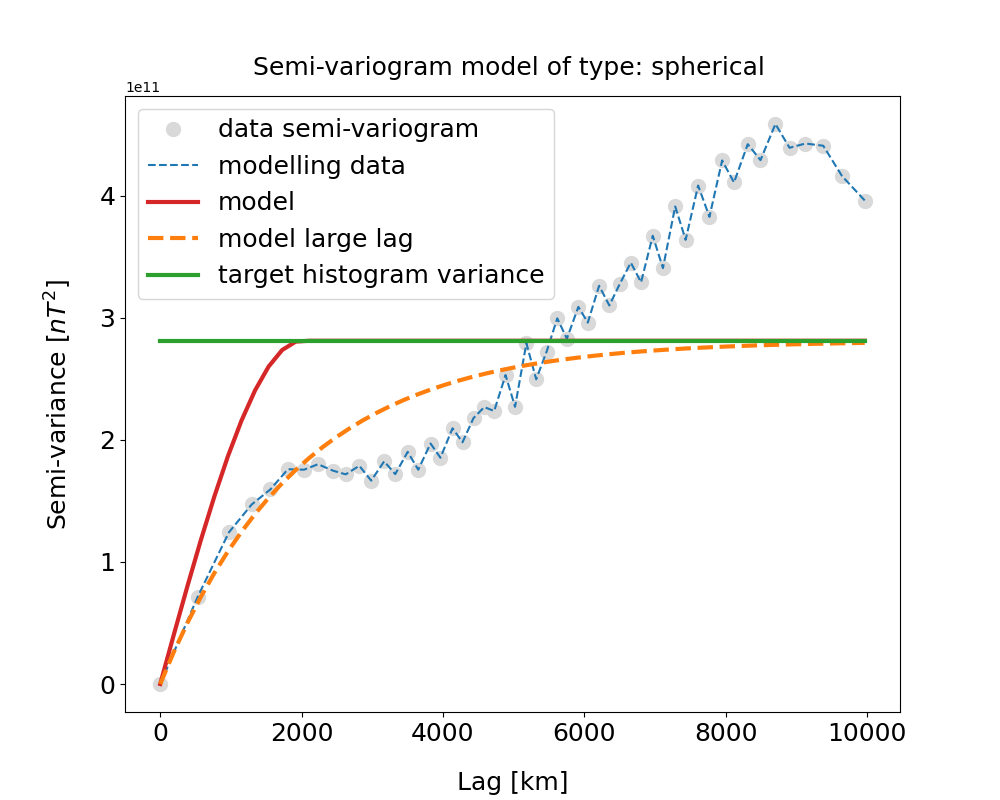

In [9]:
core.semivar(model_lags = "all", model = "exponential", max_dist = 20000, lag_length = 200,
             zero_nugget = True, hit_target_var = True)

keep_sv_curve = core.sv_curve.copy()
keep_lags_sv_curve = core.lags_sv_curve.copy()

C_e_const = 2.0

nugget = C_e_const**2
nugget_p = 0.01
var_fac = 1.0

#set_model = {"a": 2000, "C0": var_fac*core.target_var*nugget_p, "C1": var_fac*core.target_var*(1-nugget_p), "C2": None, "C3": None}
set_model = {"a": 2000, "C0": nugget, "C1": var_fac*core.target_var-nugget, "C2": None, "C3": None}


core.semivar(model_lags = 20, model = "spherical", max_dist = 20000, lag_length = 200,
             zero_nugget = True, hit_target_var = True, set_model = set_model)

#core.semivar(model_lags = 3, model = "exponential", max_dist = 20000, lag_length = 200,
#             zero_nugget = True, hit_target_var = True)


#%% PLOT SEMI-VARIOGRAM
plt.figure(figsize=(10,8)) 
plt.plot(core.lags,core.pics,'o', markersize=10,color = '0.85',label='data semi-variogram')
plt.plot(core.lags_model,core.pics_model,'--',markersize=10,label='modelling data')
plt.plot(core.lags_sv_curve,core.sv_curve,color='C3', linewidth = 3,label='model')
plt.plot(keep_lags_sv_curve,keep_sv_curve,"--",color='C1',linewidth = 3,label='model large lag')

plt.plot(core.lags_sv_curve,np.ones(core.lags_sv_curve.shape)*core.target_var,linewidth = 3, color="C2", label="target histogram variance")
plt.ylabel('Semi-variance $[%s^2]$' % "nT",fontsize=18,labelpad=18)
plt.xlabel('Lag [km]',fontsize=18,labelpad=18)
plt.title("Semi-variogram model of type: %s " % core.model_names[core.model],fontsize=18,y=1.02)
plt.legend(loc='best',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

In [10]:
#print(core)

# Synthetic sat

In [11]:
s_sat = SDSS(comment, N_SH = 30, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_sat.load_swarm("A")

grid_in = np.array([s_sat.swarm_phi, 90-s_sat.swarm_theta]).T
s_sat.make_grid(s_sat.swarm_radius, grid_in, calc_sph_d = False)

#s_sat.grid_equal_area(N_grid= 500, r_at = s_sat.r_sat, poles_remove = True)
#grid_in = np.array([s_sat.grid_eqa_phi, 90-s_sat.grid_eqa_theta]).T
#s_sat.grid(s_sat.r_sat, grid_in, calc_sph_d = False)

In [12]:
s_sat.generate_map(grid_type = "swarm")

In [13]:
s_sat.data += np.random.normal(scale = C_e_const, size = s_sat.data.shape)

In [14]:
#mt_util.plot_cartopy_global(lat = s_sat.lat, lon = s_sat.lon, plot_quality = "high", point_size=5, 
#                            data=s_sat.data, cmap = 'PuOr_r', title="Synthetic satellite data")

In [15]:
#print(s_sat)


Gauss-Legendre RMSE:	 2.031337789438


<IPython.core.display.Javascript object>


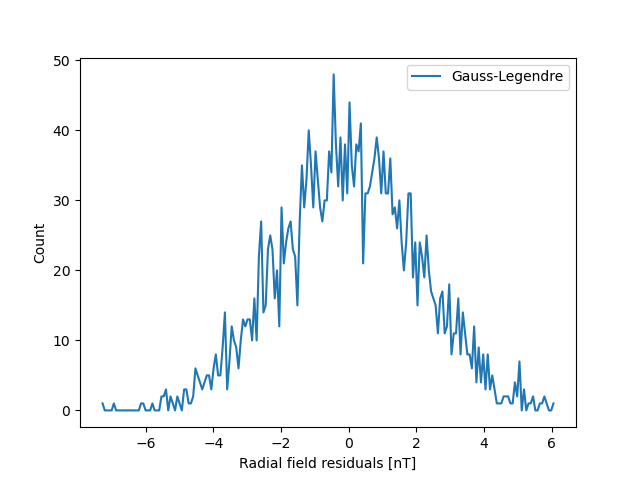

In [16]:
core.integrating_kernel(s_sat, C_e_const = C_e_const)

 |OOOOOOOOOO| 100.0%   realization nr. 0. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 56.924 seconds 
Total elapsed time: 0.949 minutes 
Variance: 252735844464.024
Mean: 85726.758
Max: 1931178.975
Min: -1467309.187
Run nr.: 1

 |OOOOOOOOOO| 100.0%   realization nr. 1. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 1.318 minutes 
Total elapsed time: 2.267 minutes 
Variance: 287802018347.116
Mean: 142665.451
Max: 1589628.307
Min: -1239997.930
Run nr.: 2

 |OOOOOOOOOO| 100.0%   realization nr. 2. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.138 minutes 
Total elapsed time: 3.405 minutes 
Variance: 213789139772.922
Mean: -68123.466
Max: 1709398.746
Min: -1265836.078
Run nr.: 3

 |OOOOOOOOOO| 100.0%   realization nr. 3. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.083 minutes 
Total elapsed time: 4.489 minutes 
Variance: 283259183070.402
Mean: -59542.367
Max: 1788223.031
Min: -1377946.193
Run nr.: 4

 |OOOOOOOOOO| 100.0%   realizati

 |OOOOOOOOOO| 100.0%   realization nr. 34. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.481 seconds 
Total elapsed time: 35.512 minutes 
Variance: 228019675763.389
Mean: -55571.065
Max: 1465102.250
Min: -1739038.050
Run nr.: 35

 |OOOOOOOOOO| 100.0%   realization nr. 35. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.905 seconds 
Total elapsed time: 36.377 minutes 
Variance: 272093861821.499
Mean: 31653.803
Max: 1451377.072
Min: -1504871.620
Run nr.: 36

 |OOOOOOOOOO| 100.0%   realization nr. 36. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.368 seconds 
Total elapsed time: 37.233 minutes 
Variance: 274077666038.708
Mean: -31993.138
Max: 1950783.946
Min: -1524998.595
Run nr.: 37

 |OOOOOOOOOO| 100.0%   realization nr. 37. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.856 seconds 
Total elapsed time: 38.080 minutes 
Variance: 279579374246.025
Mean: 141078.853
Max: 2336341.386
Min: -1453238.169
Run nr.: 38

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 68. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.035 minutes 
Total elapsed time: 1.115 hours 
Variance: 258438623967.979
Mean: 46260.929
Max: 1558202.180
Min: -1637900.384
Run nr.: 69

 |OOOOOOOOOO| 100.0%   realization nr. 69. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 50.320 seconds 
Total elapsed time: 1.129 hours 
Variance: 327580189455.228
Mean: -30754.101
Max: 2040509.837
Min: -1648587.004
Run nr.: 70

 |OOOOOOOOOO| 100.0%   realization nr. 70. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.570 seconds 
Total elapsed time: 1.143 hours 
Variance: 261024322851.367
Mean: 106063.101
Max: 1920998.347
Min: -1554028.380
Run nr.: 71

 |OOOOOOOOOO| 100.0%   realization nr. 71. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 49.834 seconds 
Total elapsed time: 1.157 hours 
Variance: 264261004542.438
Mean: 36757.476
Max: 1971503.753
Min: -1515655.529
Run nr.: 72

 |OOOOOOOOOO| 100.0%   realizat

 |OOOOOOOOOO| 100.0%   realization nr. 102. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.133 minutes 
Total elapsed time: 1.653 hours 
Variance: 270773119582.306
Mean: 133578.930
Max: 1535641.190
Min: -1531489.486
Run nr.: 103

 |OOOOOOOOOO| 100.0%   realization nr. 103. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.127 minutes 
Total elapsed time: 1.671 hours 
Variance: 281446883776.273
Mean: 29379.608
Max: 1558937.084
Min: -1598888.714
Run nr.: 104

 |OOOOOOOOOO| 100.0%   realization nr. 104. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.064 minutes 
Total elapsed time: 1.689 hours 
Variance: 306701074356.928
Mean: 43180.846
Max: 1846686.943
Min: -1652444.942
Run nr.: 105

 |OOOOOOOOOO| 100.0%   realization nr. 105. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.043 minutes 
Total elapsed time: 1.706 hours 
Variance: 268926890981.290
Mean: 7296.776
Max: 1454166.989
Min: -1620281.764
Run nr.: 106

 |OOOOOOOOOO| 100.0%   reali

 |OOOOOOOOOO| 100.0%   realization nr. 136. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.074 minutes 
Total elapsed time: 2.199 hours 
Variance: 243641314975.567
Mean: -46201.003
Max: 1512106.167
Min: -1557813.695
Run nr.: 137

 |OOOOOOOOOO| 100.0%   realization nr. 137. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.046 minutes 
Total elapsed time: 2.216 hours 
Variance: 249881620800.914
Mean: -208.721
Max: 1672534.345
Min: -1655909.001
Run nr.: 138

 |OOOOOOOOOO| 100.0%   realization nr. 138. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.007 minutes 
Total elapsed time: 2.233 hours 
Variance: 290873011857.278
Mean: 106996.850
Max: 2123851.867
Min: -1466608.058
Run nr.: 139

 |OOOOOOOOOO| 100.0%   realization nr. 139. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.080 minutes 
Total elapsed time: 2.251 hours 
Variance: 281072000523.706
Mean: -113005.131
Max: 1686481.089
Min: -1708117.421
Run nr.: 140

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 170. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.016 minutes 
Total elapsed time: 2.735 hours 
Variance: 260277630476.204
Mean: 66484.609
Max: 1678762.238
Min: -1337124.304
Run nr.: 171

 |OOOOOOOOOO| 100.0%   realization nr. 171. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.047 minutes 
Total elapsed time: 2.752 hours 
Variance: 221928919034.100
Mean: -15286.315
Max: 1468148.352
Min: -1593874.004
Run nr.: 172

 |OOOOOOOOOO| 100.0%   realization nr. 172. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.033 minutes 
Total elapsed time: 2.769 hours 
Variance: 238962338998.561
Mean: -59597.028
Max: 1448061.572
Min: -1587408.904
Run nr.: 173

 |OOOOOOOOOO| 100.0%   realization nr. 173. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.012 minutes 
Total elapsed time: 2.786 hours 
Variance: 214375809816.961
Mean: 107328.314
Max: 1639461.462
Min: -1226405.692
Run nr.: 174

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 204. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.080 minutes 
Total elapsed time: 3.318 hours 
Variance: 234612471513.896
Mean: -60736.734
Max: 1495338.202
Min: -1721319.214
Run nr.: 205

 |OOOOOOOOOO| 100.0%   realization nr. 205. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 58.818 seconds 
Total elapsed time: 3.334 hours 
Variance: 338810307222.016
Mean: -37700.130
Max: 1737564.833
Min: -1670499.641
Run nr.: 206

 |OOOOOOOOOO| 100.0%   realization nr. 206. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.033 minutes 
Total elapsed time: 3.352 hours 
Variance: 309875951813.376
Mean: -150319.399
Max: 1409753.396
Min: -1618613.577
Run nr.: 207

 |OOOOOOOOOO| 100.0%   realization nr. 207. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.050 minutes 
Total elapsed time: 3.369 hours 
Variance: 336828928601.478
Mean: -63541.841
Max: 1873536.332
Min: -1640776.118
Run nr.: 208

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 238. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.121 minutes 
Total elapsed time: 3.909 hours 
Variance: 227074786661.273
Mean: -18122.998
Max: 1916852.768
Min: -1609091.799
Run nr.: 239

 |OOOOOOOOOO| 100.0%   realization nr. 239. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.067 minutes 
Total elapsed time: 3.927 hours 
Variance: 305652805686.266
Mean: 103474.833
Max: 1958669.354
Min: -1646353.744
Run nr.: 240

 |OOOOOOOOOO| 100.0%   realization nr. 240. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.062 minutes 
Total elapsed time: 3.944 hours 
Variance: 286703432320.481
Mean: -7538.068
Max: 1445399.858
Min: -1603756.890
Run nr.: 241

 |OOOOOOOOOO| 100.0%   realization nr. 241. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 59.879 seconds 
Total elapsed time: 3.961 hours 
Variance: 243418156850.686
Mean: 91435.268
Max: 1418511.025
Min: -1439166.777
Run nr.: 242

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 272. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 59.927 seconds 
Total elapsed time: 4.497 hours 
Variance: 273445684781.911
Mean: -13921.093
Max: 1720240.939
Min: -1652976.908
Run nr.: 273

 |OOOOOOOOOO| 100.0%   realization nr. 273. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 1.037 minutes 
Total elapsed time: 4.515 hours 
Variance: 294806345793.350
Mean: -52600.600
Max: 1559767.946
Min: -1564972.598
Run nr.: 274

 |OOOOOOOOOO| 100.0%   realization nr. 274. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.013 minutes 
Total elapsed time: 4.531 hours 
Variance: 252250836400.215
Mean: -9992.110
Max: 1874182.431
Min: -1641900.431
Run nr.: 275

 |OOOOOOOOOO| 100.0%   realization nr. 275. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.056 minutes 
Total elapsed time: 4.549 hours 
Variance: 237874178708.314
Mean: -3792.707
Max: 1442275.175
Min: -1613853.676
Run nr.: 276

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 306. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.040 minutes 
Total elapsed time: 5.093 hours 
Variance: 254592832261.426
Mean: 57592.674
Max: 1727364.977
Min: -1575627.758
Run nr.: 307

 |OOOOOOOOOO| 100.0%   realization nr. 307. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 1.081 minutes 
Total elapsed time: 5.111 hours 
Variance: 268835114938.404
Mean: -39707.972
Max: 1786914.112
Min: -1526038.674
Run nr.: 308

 |OOOOOOOOOO| 100.0%   realization nr. 308. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.065 minutes 
Total elapsed time: 5.129 hours 
Variance: 225766186528.006
Mean: -64205.128
Max: 1881936.441
Min: -1324626.506
Run nr.: 309

 |OOOOOOOOOO| 100.0%   realization nr. 309. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.006 minutes 
Total elapsed time: 5.146 hours 
Variance: 253203482242.789
Mean: -82324.031
Max: 1676314.060
Min: -1414525.449
Run nr.: 310

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 340. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.044 minutes 
Total elapsed time: 5.698 hours 
Variance: 274970207275.913
Mean: 48350.483
Max: 1780400.752
Min: -1297610.162
Run nr.: 341

 |OOOOOOOOOO| 100.0%   realization nr. 341. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.010 minutes 
Total elapsed time: 5.715 hours 
Variance: 323877986650.804
Mean: -81976.318
Max: 1604043.353
Min: -1633981.174
Run nr.: 342

 |OOOOOOOOOO| 100.0%   realization nr. 342. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 1.023 minutes 
Total elapsed time: 5.732 hours 
Variance: 334388376238.796
Mean: -47524.931
Max: 2017195.986
Min: -1637683.335
Run nr.: 343

 |OOOOOOOOOO| 100.0%   realization nr. 343. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.056 minutes 
Total elapsed time: 5.749 hours 
Variance: 338270564516.677
Mean: 106023.884
Max: 1931445.889
Min: -1562755.306
Run nr.: 344

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 374. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.076 minutes 
Total elapsed time: 6.298 hours 
Variance: 293980648410.443
Mean: -92135.815
Max: 1770387.749
Min: -1709314.859
Run nr.: 375

 |OOOOOOOOOO| 100.0%   realization nr. 375. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 59.724 seconds 
Total elapsed time: 6.315 hours 
Variance: 207030899533.298
Mean: 65418.518
Max: 1912593.281
Min: -1623876.751
Run nr.: 376

 |OOOOOOOOOO| 100.0%   realization nr. 376. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.047 minutes 
Total elapsed time: 6.332 hours 
Variance: 338111633173.385
Mean: -77875.170
Max: 1462268.864
Min: -1646964.680
Run nr.: 377

 |OOOOOOOOOO| 100.0%   realization nr. 377. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 1.004 minutes 
Total elapsed time: 6.349 hours 
Variance: 388983935929.065
Mean: -57176.887
Max: 1980837.831
Min: -1770016.877
Run nr.: 378

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 408. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.024 seconds 
Total elapsed time: 6.874 hours 
Variance: 271051903154.406
Mean: -69436.905
Max: 1733853.223
Min: -1706310.787
Run nr.: 409

 |OOOOOOOOOO| 100.0%   realization nr. 409. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.947 seconds 
Total elapsed time: 6.888 hours 
Variance: 226543957173.852
Mean: -116728.495
Max: 1294070.393
Min: -1631718.269
Run nr.: 410

 |OOOOOOOOOO| 100.0%   realization nr. 410. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.956 seconds 
Total elapsed time: 6.902 hours 
Variance: 267933265869.892
Mean: -100462.112
Max: 1866895.875
Min: -1774000.926
Run nr.: 411

 |OOOOOOOOOO| 100.0%   realization nr. 411. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.625 seconds 
Total elapsed time: 6.916 hours 
Variance: 179625288530.328
Mean: -30878.182
Max: 1512811.382
Min: -1499279.042
Run nr.: 412

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 442. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.697 seconds 
Total elapsed time: 7.358 hours 
Variance: 254036465386.099
Mean: 123019.389
Max: 1851834.886
Min: -1504310.764
Run nr.: 443

 |OOOOOOOOOO| 100.0%   realization nr. 443. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.640 seconds 
Total elapsed time: 7.373 hours 
Variance: 223781609714.707
Mean: -138272.355
Max: 1311324.490
Min: -1643858.906
Run nr.: 444

 |OOOOOOOOOO| 100.0%   realization nr. 444. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 53.749 seconds 
Total elapsed time: 7.388 hours 
Variance: 287731995118.247
Mean: -9299.598
Max: 1939335.530
Min: -1598399.073
Run nr.: 445

 |OOOOOOOOOO| 100.0%   realization nr. 445. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 52.318 seconds 
Total elapsed time: 7.402 hours 
Variance: 265003422990.289
Mean: -102033.089
Max: 1331751.717
Min: -1526394.347
Run nr.: 446

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 476. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.406 seconds 
Total elapsed time: 7.844 hours 
Variance: 232332755842.695
Mean: 27234.301
Max: 1639949.608
Min: -1579019.502
Run nr.: 477

 |OOOOOOOOOO| 100.0%   realization nr. 477. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.934 seconds 
Total elapsed time: 7.859 hours 
Variance: 271667722430.462
Mean: 96916.455
Max: 1781234.274
Min: -1812622.720
Run nr.: 478

 |OOOOOOOOOO| 100.0%   realization nr. 478. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.751 seconds 
Total elapsed time: 7.873 hours 
Variance: 227171211515.003
Mean: -80280.547
Max: 1438400.225
Min: -1646394.976
Run nr.: 479

 |OOOOOOOOOO| 100.0%   realization nr. 479. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.338 seconds 
Total elapsed time: 7.887 hours 
Variance: 241752204565.040
Mean: -46898.024
Max: 1812992.446
Min: -1614246.337
Run nr.: 480

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 510. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 49.974 seconds 
Total elapsed time: 8.329 hours 
Variance: 241793695025.792
Mean: -18999.597
Max: 1469485.505
Min: -1660323.640
Run nr.: 511

 |OOOOOOOOOO| 100.0%   realization nr. 511. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.822 seconds 
Total elapsed time: 8.344 hours 
Variance: 303607284721.993
Mean: 115156.744
Max: 1523354.714
Min: -1592647.905
Run nr.: 512

 |OOOOOOOOOO| 100.0%   realization nr. 512. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 54.531 seconds 
Total elapsed time: 8.359 hours 
Variance: 297273021604.592
Mean: -69759.473
Max: 2057464.406
Min: -1665131.047
Run nr.: 513

 |OOOOOOOOOO| 100.0%   realization nr. 513. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.460 seconds 
Total elapsed time: 8.373 hours 
Variance: 246026395516.221
Mean: -41753.300
Max: 1908329.162
Min: -1858760.905
Run nr.: 514

 |OOOOOOOOOO| 100.0%

 |OOOOOOOOOO| 100.0%   realization nr. 544. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.071 seconds 
Total elapsed time: 8.816 hours 
Variance: 295704193117.714
Mean: 6304.352
Max: 1825161.549
Min: -1517463.213
Run nr.: 545

 |OOOOOOOOOO| 100.0%   realization nr. 545. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 52.919 seconds 
Total elapsed time: 8.830 hours 
Variance: 273872360179.615
Mean: -6766.222
Max: 2183427.071
Min: -1874039.930
Run nr.: 546

 |OOOOOOOOOO| 100.0%   realization nr. 546. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 50.978 seconds 
Total elapsed time: 8.844 hours 
Variance: 244812501161.061
Mean: 69590.698
Max: 2481655.406
Min: -1630388.219
Run nr.: 547

 |OOOOOOOOOO| 100.0%   realization nr. 547. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.369 seconds 
Total elapsed time: 8.858 hours 
Variance: 263774401336.925
Mean: 37138.561
Max: 1871219.501
Min: -1760994.616
Run nr.: 548

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 578. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.818 seconds 
Total elapsed time: 9.300 hours 
Variance: 325450374289.052
Mean: -27201.845
Max: 1897894.130
Min: -1695610.510
Run nr.: 579

 |OOOOOOOOOO| 100.0%   realization nr. 579. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.484 seconds 
Total elapsed time: 9.314 hours 
Variance: 276160006863.463
Mean: 68011.540
Max: 1466253.739
Min: -1631060.237
Run nr.: 580

 |OOOOOOOOOO| 100.0%   realization nr. 580. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.195 seconds 
Total elapsed time: 9.328 hours 
Variance: 305152806333.514
Mean: 27356.826
Max: 1771801.199
Min: -1639092.393
Run nr.: 581

 |OOOOOOOOOO| 100.0%   realization nr. 581. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.728 seconds 
Total elapsed time: 9.342 hours 
Variance: 292663280334.460
Mean: 61148.363
Max: 1737281.478
Min: -1650442.348
Run nr.: 582

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 612. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 51.623 seconds 
Total elapsed time: 9.784 hours 
Variance: 325856782073.648
Mean: 15193.082
Max: 1631630.099
Min: -1483672.893
Run nr.: 613

 |OOOOOOOOOO| 100.0%   realization nr. 613. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.780 seconds 
Total elapsed time: 9.798 hours 
Variance: 232520211621.448
Mean: -34080.274
Max: 1306077.677
Min: -1601897.926
Run nr.: 614

 |OOOOOOOOOO| 100.0%   realization nr. 614. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.601 seconds 
Total elapsed time: 9.812 hours 
Variance: 357068120793.014
Mean: 25523.342
Max: 1991236.093
Min: -1636386.226
Run nr.: 615

 |OOOOOOOOOO| 100.0%   realization nr. 615. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 49.944 seconds 
Total elapsed time: 9.826 hours 
Variance: 362408896508.834
Mean: -23060.706
Max: 1760996.342
Min: -1586032.211
Run nr.: 616

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 646. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.634 seconds 
Total elapsed time: 10.266 hours 
Variance: 302912401779.460
Mean: 121867.729
Max: 1754356.825
Min: -1627259.597
Run nr.: 647

 |OOOOOOOOOO| 100.0%   realization nr. 647. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.324 seconds 
Total elapsed time: 10.280 hours 
Variance: 271692824181.885
Mean: -26201.595
Max: 1822087.562
Min: -1623710.725
Run nr.: 648

 |OOOOOOOOOO| 100.0%   realization nr. 648. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.452 seconds 
Total elapsed time: 10.294 hours 
Variance: 250400418746.711
Mean: -91052.540
Max: 1453308.131
Min: -1537761.862
Run nr.: 649

 |OOOOOOOOOO| 100.0%   realization nr. 649. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 50.441 seconds 
Total elapsed time: 10.308 hours 
Variance: 239621803903.453
Mean: -108836.188
Max: 1666470.031
Min: -1643828.212
Run nr.: 650

 |OOOOOOOOOO| 1

 |O---------| 17.1%   realization nr. 679. Counter: 324/1891, Running error magnitude: 5.5

 |OOOOOOOOOO| 100.0%   realization nr. 679. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.717 seconds 
Total elapsed time: 10.736 hours 
Variance: 196222809301.102
Mean: -7505.853
Max: 1451467.364
Min: -1519461.788
Run nr.: 680

 |OOOOOOOOOO| 100.0%   realization nr. 680. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 50.738 seconds 
Total elapsed time: 10.750 hours 
Variance: 205091587536.909
Mean: 35145.275
Max: 1809001.931
Min: -1230727.332
Run nr.: 681

 |OOOOOOOOOO| 100.0%   realization nr. 681. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 52.894 seconds 
Total elapsed time: 10.764 hours 
Variance: 246685483268.976
Mean: 146513.797
Max: 1458663.044
Min: -1598225.510
Run nr.: 682

 |OOOOOOOOOO| 100.0%   realization nr. 682. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 51.438 seconds 
Total elapsed time: 10.779 hours 
Variance: 240603247024.446
Mean: -235965.824
Max: 1545140.448
Min: -1585231.248
Run nr.: 683

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 712. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 51.237 seconds 
Total elapsed time: 11.206 hours 
Variance: 215973421211.372
Mean: -10733.070
Max: 1528793.390
Min: -1565148.105
Run nr.: 713

 |OOOOOOOOOO| 100.0%   realization nr. 713. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 46.631 seconds 
Total elapsed time: 11.219 hours 
Variance: 266014393774.304
Mean: -109548.345
Max: 2372920.228
Min: -1628289.160
Run nr.: 714

 |OOOOOOOOOO| 100.0%   realization nr. 714. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.196 seconds 
Total elapsed time: 11.231 hours 
Variance: 233779436761.101
Mean: -83547.499
Max: 1689621.156
Min: -1556380.413
Run nr.: 715

 |OOOOOOOOOO| 100.0%   realization nr. 715. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.360 seconds 
Total elapsed time: 11.242 hours 
Variance: 243015125843.342
Mean: 74189.098
Max: 1547000.373
Min: -1426785.627
Run nr.: 716

 |OOOOOOOOOO| 10

 |OOOOOOOOOO| 100.0%   realization nr. 745. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.779 seconds 
Total elapsed time: 11.588 hours 
Variance: 252094391276.768
Mean: 624.583
Max: 1839430.219
Min: -1648265.796
Run nr.: 746

 |OOOOOOOOOO| 100.0%   realization nr. 746. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.841 seconds 
Total elapsed time: 11.600 hours 
Variance: 326037622004.746
Mean: -9999.634
Max: 1795591.850
Min: -1571270.930
Run nr.: 747

 |OOOOOOOOOO| 100.0%   realization nr. 747. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.794 seconds 
Total elapsed time: 11.612 hours 
Variance: 264209669664.834
Mean: -6350.461
Max: 1565716.436
Min: -1678569.638
Run nr.: 748

 |OOOOOOOOOO| 100.0%   realization nr. 748. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.617 seconds 
Total elapsed time: 11.623 hours 
Variance: 277475628571.489
Mean: 84720.778
Max: 1734232.379
Min: -1641904.176
Run nr.: 749

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 779. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.555 seconds 
Total elapsed time: 11.981 hours 
Variance: 257693335850.918
Mean: 19851.341
Max: 1439294.123
Min: -1857702.961
Run nr.: 780

 |OOOOOOOOOO| 100.0%   realization nr. 780. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.682 seconds 
Total elapsed time: 11.993 hours 
Variance: 264961808157.778
Mean: 28743.373
Max: 1442288.975
Min: -1703369.460
Run nr.: 781

 |OOOOOOOOOO| 100.0%   realization nr. 781. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.582 seconds 
Total elapsed time: 12.004 hours 
Variance: 251637738189.796
Mean: -27373.283
Max: 1635659.376
Min: -1611608.345
Run nr.: 782

 |OOOOOOOOOO| 100.0%   realization nr. 782. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.624 seconds 
Total elapsed time: 12.016 hours 
Variance: 266239808313.719
Mean: 21054.900
Max: 2007415.507
Min: -1655235.780
Run nr.: 783

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 812. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.418 seconds 
Total elapsed time: 12.362 hours 
Variance: 256233255272.984
Mean: 68662.095
Max: 1818772.806
Min: -1623220.591
Run nr.: 813

 |OOOOOOOOOO| 100.0%   realization nr. 813. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.630 seconds 
Total elapsed time: 12.374 hours 
Variance: 267364397136.600
Mean: 150744.941
Max: 1515095.014
Min: -1592410.939
Run nr.: 814

 |OOOOOOOOOO| 100.0%   realization nr. 814. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 41.466 seconds 
Total elapsed time: 12.385 hours 
Variance: 225713381257.343
Mean: 59771.186
Max: 1797727.791
Min: -1310245.842
Run nr.: 815

 |OOOOOOOOOO| 100.0%   realization nr. 815. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.695 seconds 
Total elapsed time: 12.397 hours 
Variance: 239105660421.402
Mean: -20165.481
Max: 1300487.794
Min: -1625177.747
Run nr.: 816

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 846. Counter: 1891/1891, Running error magnitude: 5.7
Run time: 41.865 seconds 
Total elapsed time: 12.754 hours 
Variance: 345660170283.670
Mean: -38925.368
Max: 2462137.663
Min: -1586295.888
Run nr.: 847

 |OOOOOOOOOO| 100.0%   realization nr. 847. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.644 seconds 
Total elapsed time: 12.766 hours 
Variance: 239664002429.636
Mean: -70018.366
Max: 1709882.961
Min: -1643876.388
Run nr.: 848

 |OOOOOOOOOO| 100.0%   realization nr. 848. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 41.712 seconds 
Total elapsed time: 12.778 hours 
Variance: 249881897837.271
Mean: 3633.648
Max: 1551709.041
Min: -1594804.853
Run nr.: 849

 |OOOOOOOOOO| 100.0%   realization nr. 849. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 41.979 seconds 
Total elapsed time: 12.789 hours 
Variance: 216764051453.398
Mean: 29169.635
Max: 1437918.979
Min: -1616389.753
Run nr.: 850

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 880. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.536 seconds 
Total elapsed time: 13.147 hours 
Variance: 266066201282.608
Mean: 29332.431
Max: 1638248.113
Min: -1559976.661
Run nr.: 881

 |OOOOOOOOOO| 100.0%   realization nr. 881. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.526 seconds 
Total elapsed time: 13.159 hours 
Variance: 253857483640.321
Mean: -32331.912
Max: 1751862.843
Min: -1353251.393
Run nr.: 882

 |OOOOOOOOOO| 100.0%   realization nr. 882. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.546 seconds 
Total elapsed time: 13.171 hours 
Variance: 276632608006.773
Mean: 18903.847
Max: 1817580.271
Min: -1641925.168
Run nr.: 883

 |OOOOOOOOOO| 100.0%   realization nr. 883. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.599 seconds 
Total elapsed time: 13.182 hours 
Variance: 286694176443.089
Mean: -85806.070
Max: 1356068.154
Min: -1660716.479
Run nr.: 884

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 914. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.361 seconds 
Total elapsed time: 13.540 hours 
Variance: 215728680505.503
Mean: 58603.416
Max: 1917048.637
Min: -1458568.466
Run nr.: 915

 |OOOOOOOOOO| 100.0%   realization nr. 915. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.832 seconds 
Total elapsed time: 13.552 hours 
Variance: 241443935592.580
Mean: 102875.444
Max: 1656154.268
Min: -1129806.677
Run nr.: 916

 |OOOOOOOOOO| 100.0%   realization nr. 916. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.799 seconds 
Total elapsed time: 13.563 hours 
Variance: 243374046604.778
Mean: 28198.459
Max: 1884659.365
Min: -1410879.442
Run nr.: 917

 |OOOOOOOOOO| 100.0%   realization nr. 917. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.249 seconds 
Total elapsed time: 13.575 hours 
Variance: 232981117034.743
Mean: -88679.863
Max: 1445108.645
Min: -1619353.993
Run nr.: 918

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 947. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.670 seconds 
Total elapsed time: 13.921 hours 
Variance: 279226582918.208
Mean: 19278.097
Max: 1998427.922
Min: -1614747.826
Run nr.: 948

 |OOOOOOOOOO| 100.0%   realization nr. 948. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 41.670 seconds 
Total elapsed time: 13.933 hours 
Variance: 233726954418.008
Mean: -66644.777
Max: 1228869.409
Min: -1541725.327
Run nr.: 949

 |OOOOOOOOOO| 100.0%   realization nr. 949. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.438 seconds 
Total elapsed time: 13.944 hours 
Variance: 346724155915.499
Mean: 146603.477
Max: 1885068.408
Min: -1452533.379
Run nr.: 950

 |OOOOOOOOOO| 100.0%   realization nr. 950. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 41.535 seconds 
Total elapsed time: 13.956 hours 
Variance: 234794824110.053
Mean: -195396.783
Max: 1375446.357
Min: -1644202.006
Run nr.: 951

 |OOOOOOOOOO| 10

 |OOOOOOOOOO| 100.0%   realization nr. 980. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.830 seconds 
Total elapsed time: 14.303 hours 
Variance: 359473857880.429
Mean: -42008.837
Max: 1741309.471
Min: -1689344.814
Run nr.: 981

 |OOOOOOOOOO| 100.0%   realization nr. 981. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 41.589 seconds 
Total elapsed time: 14.315 hours 
Variance: 243229678628.134
Mean: -95365.261
Max: 1899689.388
Min: -1644722.297
Run nr.: 982

 |OOOOOOOOOO| 100.0%   realization nr. 982. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.630 seconds 
Total elapsed time: 14.326 hours 
Variance: 270517115969.289
Mean: 973.875
Max: 1878145.738
Min: -1601889.080
Run nr.: 983

 |OOOOOOOOOO| 100.0%   realization nr. 983. Counter: 1891/1891, Running error magnitude: 5.6
Run time: 41.659 seconds 
Total elapsed time: 14.338 hours 
Variance: 296190794334.011
Mean: 135479.498
Max: 1988180.336
Min: -1483450.922
Run nr.: 984

 |OOOOOOOOOO| 100.0

<IPython.core.display.Javascript object>


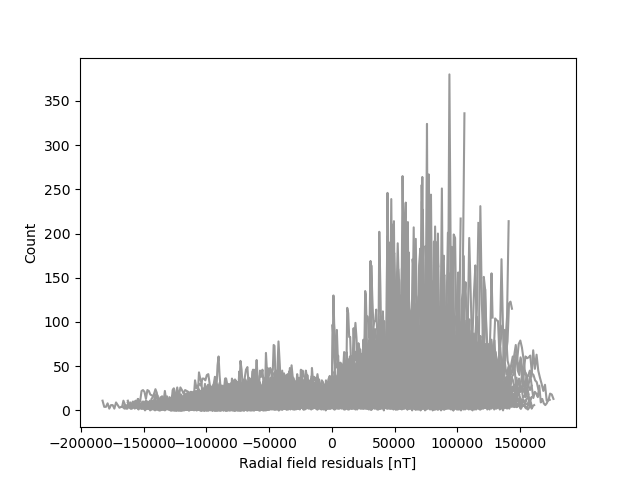

In [17]:
N_sim = 1000

core.run_sim(N_sim, core.grid_glq_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
        s_sat.data, core.data, scale_m_i = True, unit_d = False, collect_all = False,
        sense_running_error = True, save_string = nb_name, sim_stochastic = True)

In [18]:
core.realization_to_sh_coeff(core.r_cmb, set_nmax = 30)

In [19]:
core.covmod_lsq_equiv(s_sat.data, core.C_mm_all, core.G, core.r_cmb)

<IPython.core.display.Javascript object>


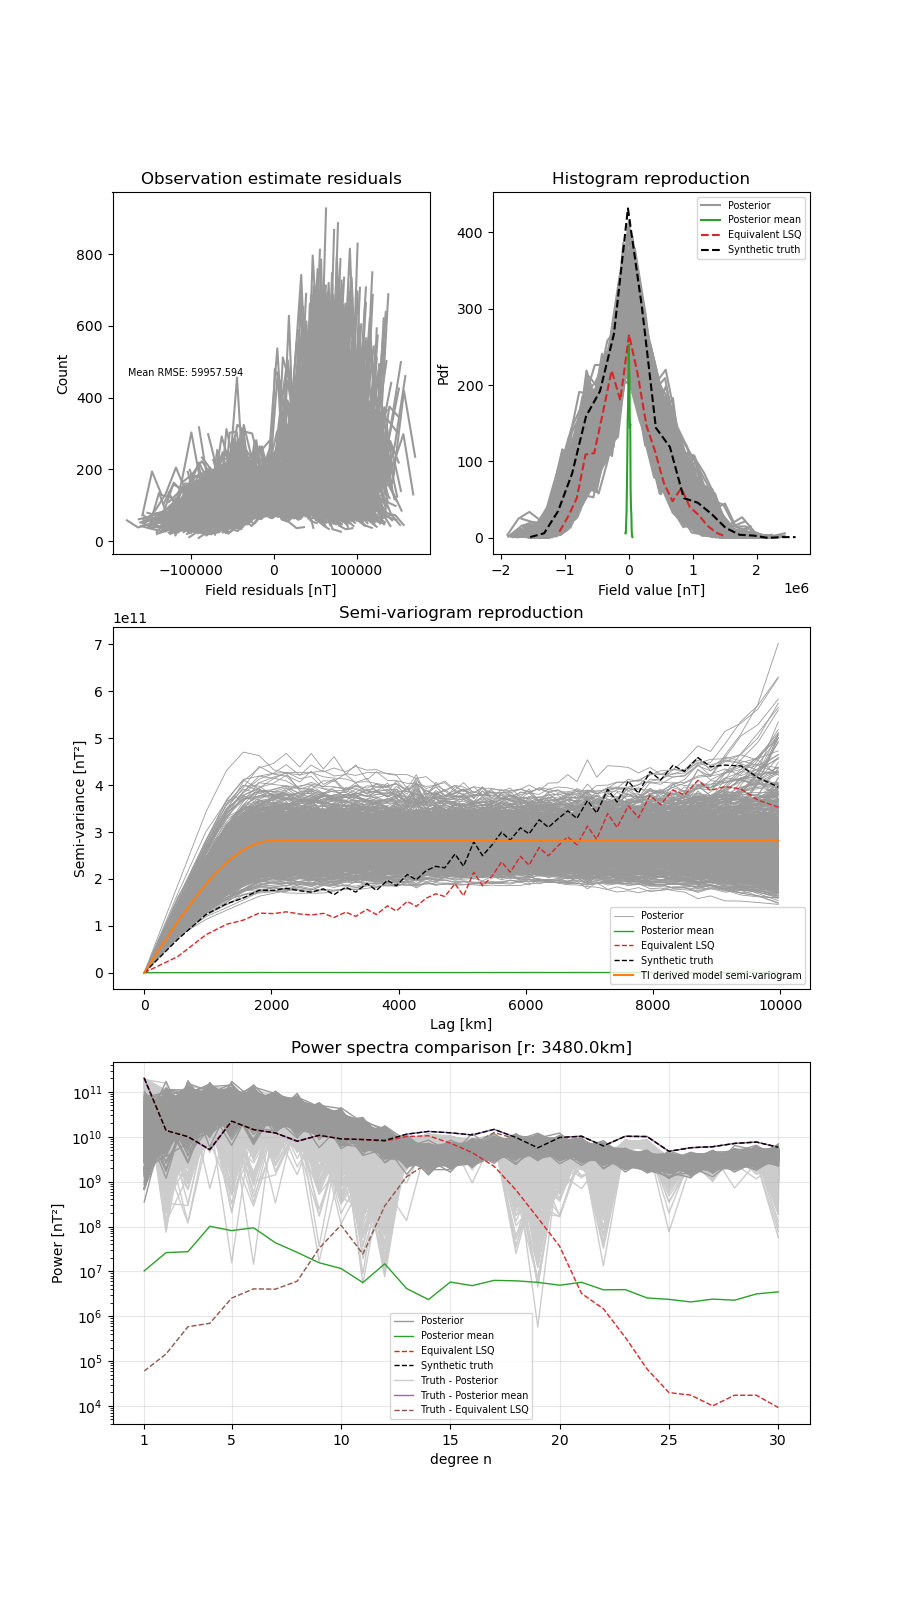

In [20]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

core.grid_glq(nmax = 30, r_at = core.r_cmb)
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = core.m_equiv_lsq,
                              lags_use = 1000, spec_r_at = core.r_cmb,
                              model_dict = {}, figsize=(9,16),
                              hist_bins = 20, res_bins = 20,
                              savefig = False, save_string = "core_A_sh30_pdfhist", save_dpi = 100)

# Conditional table investigation

In [47]:
print(core)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Finding sparsity by digging into histogram reproduction
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  30
N_SH_secondary:        None
sim_type:              core
grid_glq_zero:         (31,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools:    (31,), Max/Min: 0.10 / 0.01
grid_glq_shape:        (2,), Max/Min: 61.00 / 31.00
grid_glq_w:            (1891,), Max/Min: 0.10 / 0.01
grid_glq_radial:       (1891,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:        (1891,), Max/Min: 175.63 / 4.37
grid_glq_phi:          (1891,), Max/Min: 354.10 / 0.00
grid_glq_N:            1891
grid_glq_nmax:         30
r_grid:                3480.0
grid:                  (1891, 2)
sph_d:                 (1891, 1891)
lon:                 

<IPython.core.display.Javascript object>


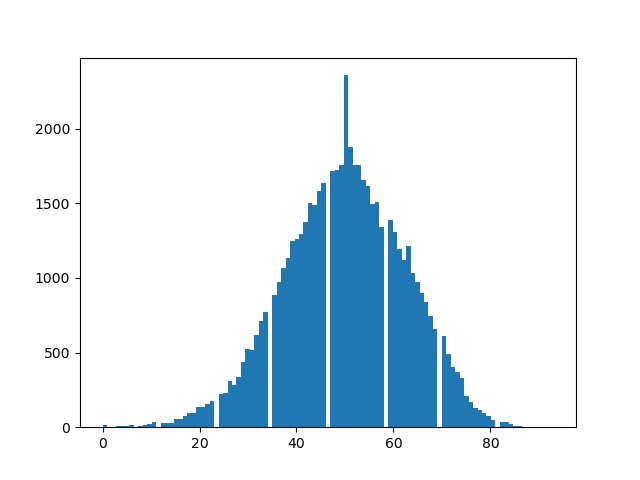

<IPython.core.display.Javascript object>


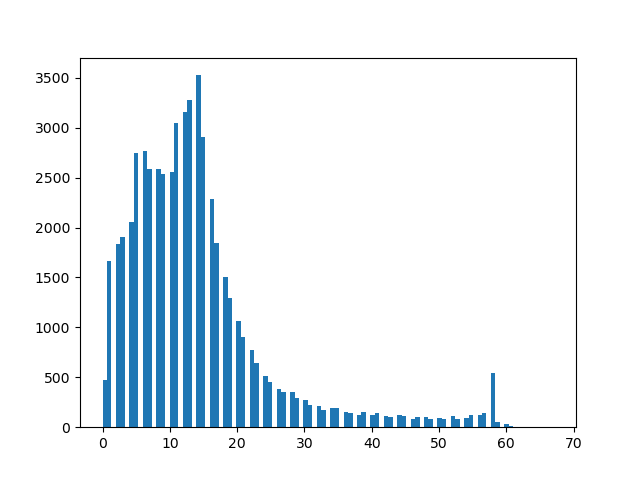

In [34]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=101)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=101)
plt.show()

In [22]:
k_vs = []

for i in np.arange(0,len(core.kriging_mv_collect)):
    k_vs.append(core.kriging_mv_collect[i][1])

<IPython.core.display.Javascript object>


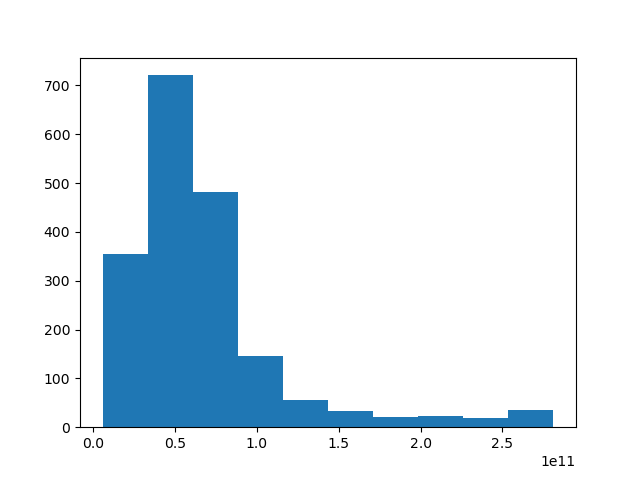

In [23]:
plt.figure()
plt.hist(k_vs)
plt.show()

# Count sampling

In [23]:
# animation
from matplotlib import animation, rc
from IPython.display import HTML, Image, display, Video
import os

In [31]:
samples_emp_QF = []
for j in np.arange(0,core.m_DSS.shape[0]):
    nv_in = core.idx_nv_collect[j]
    test_CQF_dist = core.CQF_dist[nv_in[0],nv_in[1],:]
    samples_emp_QF.append(test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=1)])
    
samples_emp_QF = np.array(samples_emp_QF)

In [32]:
samples_emp_QF.shape

(1891, 1)

In [23]:
def conditional_lookup(self, mu_k, sigma_sq_k, dm, dv, scaling = True):
        #conditional_lookup(self, cond_mean, cond_var, cond_dist, cond_dist_size, mu_k, sigma_sq_k, dm, dv):
        #conditional_lookup(core.CQF_mean, core.CQF_var, core.CQF_dist, core.condtab_normsize, mu_k, sigma_sq_k, dm_c, dv_c)

        #distance = np.power((self.CQF_mean-mu_k)/dm,2)+np.power((self.CQF_var-sigma_sq_k)/dv,2)   
        #distance = np.power((self.CQF_mean-mu_k),2)+np.power((self.CQF_var-sigma_sq_k),2)        
        
        #distance = np.power((self.CQF_mean-mu_k)/dm,2)+abs(self.CQF_var-sigma_sq_k)/np.sqrt(dv)
        
        distance = abs(self.CQF_mean-mu_k)/dm+abs(self.CQF_var-sigma_sq_k)/dv # THIS ONE
        
        #distance = abs(self.CQF_mean-mu_k)+abs(self.CQF_var-sigma_sq_k)
        
        nearest = np.unravel_index(np.argmin(distance),self.CQF_mean.shape)
        idx_n = nearest[0]
        idx_v = nearest[-1]
        
        nearest_dist = self.CQF_dist[idx_n,idx_v,:]
        
        m_i = nearest_dist[np.random.randint(0,self.condtab_normsize,size=1)]

        if scaling == True:
            m_i_mean = self.CQF_mean[idx_n,idx_v]        
            m_i_std = np.sqrt(self.CQF_var[idx_n,idx_v],dtype=np.float64)
            m_k = (m_i - m_i_mean)*np.sqrt(sigma_sq_k)/m_i_std+mu_k
        else:
            m_k = m_i

        return idx_n, idx_v, nearest_dist, m_i, distance

[365]
23
18


<IPython.core.display.Javascript object>


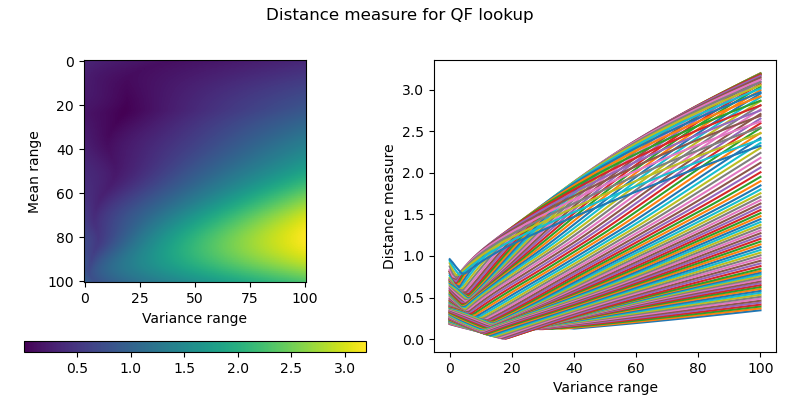

In [33]:
from matplotlib.colorbar import Colorbar

data_min = np.min(core.data)
data_max = np.max(core.data)
dm = data_max - data_min
dv = core.target_var

idx_rand_field_value = np.random.randint(0,len(core.data),size=1)
idx_n, idx_v, nearest_dist, m_i, distance = conditional_lookup(core, core.kriging_mv_collect[int(idx_rand_field_value)][0], 
                                                               core.kriging_mv_collect[int(idx_rand_field_value)][1], dm, dv)
print(idx_rand_field_value)
print(idx_n)
print(idx_v)

fig = plt.figure(figsize=(8,4), constrained_layout=False) # Initiate figure with constrained layout
fig.suptitle("Distance measure for QF lookup")

gs = fig.add_gridspec(2, 2, height_ratios=[1,0.05], width_ratios=[1,1]) # Add x-by-y grid
ax_cb = fig.add_subplot(gs[1, 0])

#% RESIDUALS
ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(distance)
#cbax = plt.subplot(gs[0,0]) # Set colorbar position
cb = Colorbar(mappable = im, ax = ax_cb, orientation = "horizontal") # im, ax=ax, 
ax.set_xlabel("Variance range")
ax.set_ylabel("Mean range")
ax = fig.add_subplot(gs[:, 1])
ax.plot(distance.T)
ax.set_xlabel("Variance range")
ax.set_ylabel("Distance measure")

fig.subplots_adjust(left=0.03, bottom=0.12, right=0.97, top=0.85, wspace = 0.2, hspace=0.5)

plt.show()

In [20]:
core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)

set_nmax = 30

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble_glq[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble_glq[:,0].copy()

core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble_glq[:,0].copy()

core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
lsq_eqa = core.B_ensemble_glq[:,0].copy()

<IPython.core.display.Javascript object>


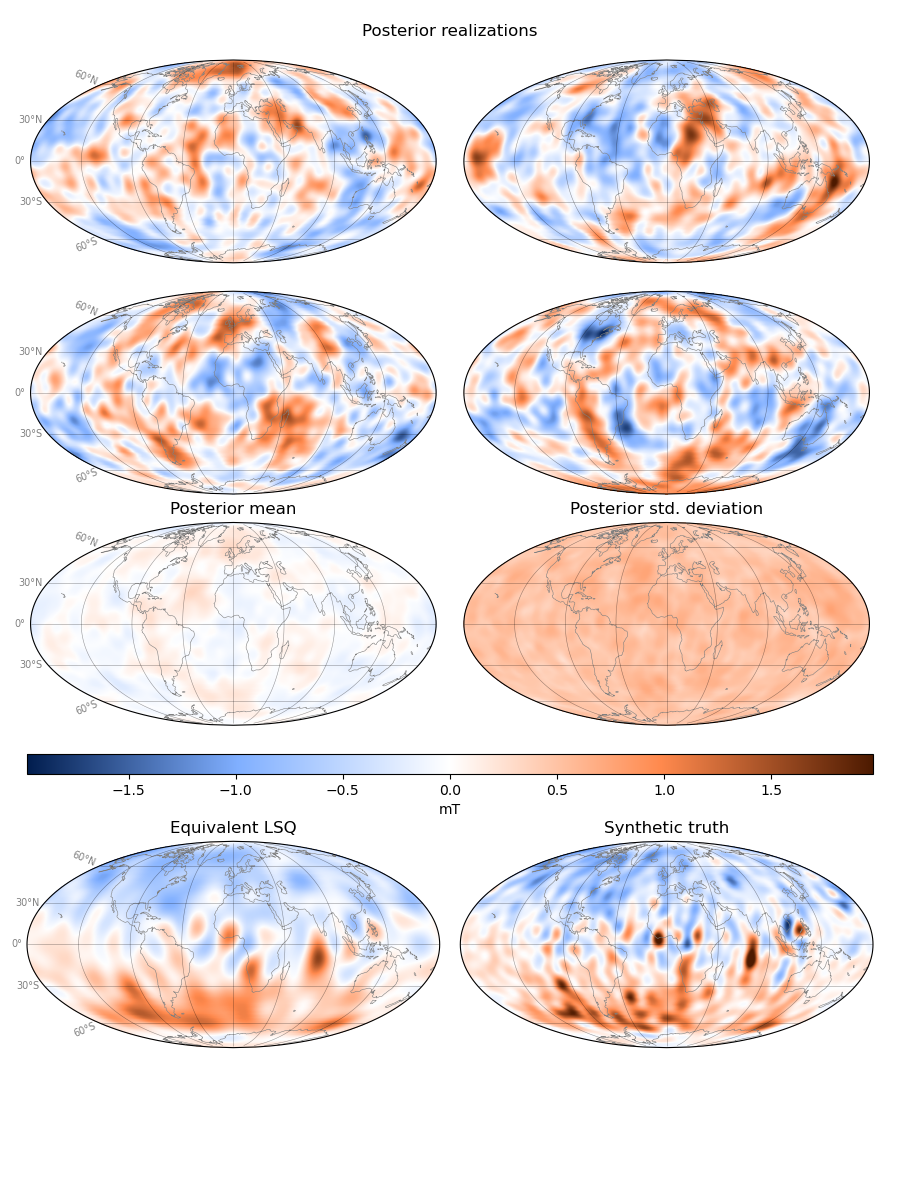

In [21]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_glq_phi, 90-core.grid_glq_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = lsq_eqa, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 10, cbar_mm_factor = 2/3,
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.2, 
                        savefig = False, save_string = "core_A_sh30_pdfhist", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)


In [23]:
# SAVE RESULT
#print("\nSaving job")
#file_clip = open("core_{}.obj".format(nb_name), "wb")
#pickle.dump(core, file_clip, protocol=4)
#file_clip.close()

#file_clip = open("sat_{}.obj".format(nb_name), "wb")
#pickle.dump(s_sat, file_clip, protocol=4)
#file_clip.close()
#print("\nJob saved and finished")